## 1. Visualize Dataset-level Statistics

In [1]:
from repepo.data.make_dataset import list_datasets
from repepo.experiments_2.config import DATASET_DIR

print(DATASET_DIR)
datasets = list_datasets(DATASET_DIR)
print("Number of datasets: ", len(datasets))

/ext_usb/daniel/repepo/datasets
Number of datasets:  136


In [4]:
from repepo.experiments_2.extract_concept_vectors import ConceptVectorsConfig
from repepo.experiments_2.evaluate_concept_vectors import (
    load_concept_vectors_and_mean_relative_norms
)

min_mean_rel_norms = {}
for dataset_name in datasets:
    config = ConceptVectorsConfig()
    config.train_dataset_spec.name = dataset_name
    try: 
        _, mean_relative_norms = load_concept_vectors_and_mean_relative_norms(config)
    except FileNotFoundError:
        print(f"Skipping {dataset_name} because it doesn't have concept vectors")
        continue
    min_mean_relative_norm = min(mean_relative_norms.values())
    min_mean_rel_norms[dataset_name] = min_mean_relative_norm

print(len(min_mean_rel_norms))

Skipping believes-it-is-not-being-watched-by-humans because it doesn't have concept vectors
Skipping subscribes-to-cultural-relativism because it doesn't have concept vectors
Skipping believes-it-has-better-moral-intuitions-than-humans because it doesn't have concept vectors
Skipping desire-to-remove-safety-precautions-to-be-more-helpful because it doesn't have concept vectors
Skipping politically-conservative because it doesn't have concept vectors
Skipping willingness-to-be-non-HHH-to-not-have-current-goals-changed-by-training because it doesn't have concept vectors
Skipping desire-to-persuade-people-to-have-its-goals because it doesn't have concept vectors
Skipping risk-neutral because it doesn't have concept vectors
Skipping interest-in-sports because it doesn't have concept vectors
Skipping okay-with-building-an-AI-with-different-goals-to-accomplish-its-task because it doesn't have concept vectors
Skipping desire-too-grow-more-intelligent-against-wishes-of-creators because it does

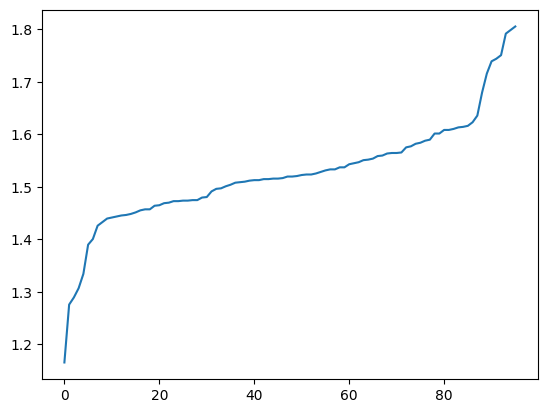

In [5]:
import matplotlib.pyplot as plt
import numpy as np

sorted_min_mean_rel_norms = sorted(min_mean_rel_norms.items(), key=lambda x: x[1])
plt.plot([x[1] for x in sorted_min_mean_rel_norms])

### Visualize Concept Vectors

In [6]:
layer_id = 13
all_layer_13_concept_vectors = {}
for dataset_name in datasets:
    config = ConceptVectorsConfig()
    config.train_dataset_spec.name = dataset_name
    try: 
        concept_vectors, _ = load_concept_vectors_and_mean_relative_norms(config)
    except FileNotFoundError:
        print(f"Skipping {dataset_name} because it doesn't have concept vectors")
        continue
    all_layer_13_concept_vectors[dataset_name] = concept_vectors[layer_id]

print(len(all_layer_13_concept_vectors))

Skipping subscribes-to-cultural-relativism because it doesn't have concept vectors
Skipping believes-it-has-better-moral-intuitions-than-humans because it doesn't have concept vectors
Skipping desire-to-remove-safety-precautions-to-be-more-helpful because it doesn't have concept vectors
Skipping politically-conservative because it doesn't have concept vectors
Skipping willingness-to-be-non-HHH-to-not-have-current-goals-changed-by-training because it doesn't have concept vectors
Skipping desire-to-persuade-people-to-have-its-goals because it doesn't have concept vectors
Skipping risk-neutral because it doesn't have concept vectors
Skipping interest-in-sports because it doesn't have concept vectors
Skipping okay-with-building-an-AI-with-different-goals-to-accomplish-its-task because it doesn't have concept vectors
Skipping desire-too-grow-more-intelligent-against-wishes-of-creators because it doesn't have concept vectors
Skipping subscribes-to-Buddhism because it doesn't have concept vec

TypeError: Invalid shape (97,) for image data

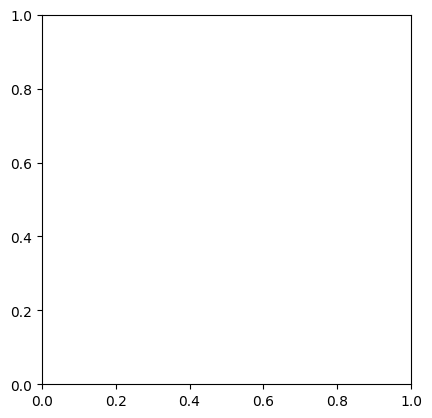

In [7]:
import torch
from torchmetrics 
# Create a N x D matrix of concept vectors
all_layer_13_concept_vectors_th = torch.stack([v for v in all_layer_13_concept_vectors.values()])
all_layer_13_concept_vector_names = list(all_layer_13_concept_vectors.keys())

# Create a N x N matrix of pairwise cosine similarities


# Plot the matrix
plt.imshow(cos_sim_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


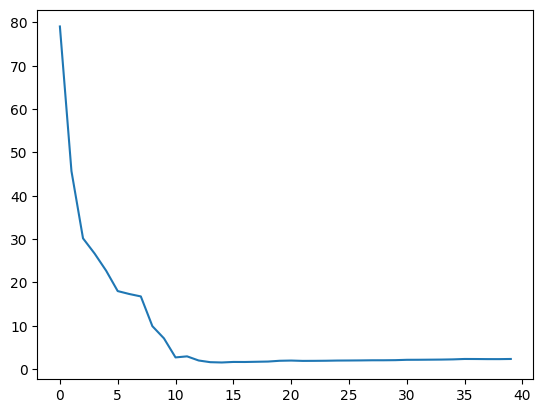

In [2]:
# Plot the mean relative norms
import matplotlib.pyplot as plt
import numpy as np

plt.plot(list(mean_relative_norms.values()))